# 決定木

データをうまく分類して分類します。
こまかく分類すればするほど（葉を増やすほど）サンプルデータに沿いますが、当然

テストデータではアです


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math

In [3]:
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

In [4]:
tree = DecisionTreeClassifier()

In [6]:
iris = load_iris()
scores = cross_val_score(tree, iris.data, iris.target, cv=10)
scores

array([1.        , 0.93333333, 1.        , 0.93333333, 0.93333333,
       0.86666667, 0.93333333, 1.        , 1.        , 1.        ])

## cross_val_score

通常は、学習用と検証用に分ける。
ただ、学習データが少ないとうまく検証もできない。

よって、学習データをk分割してどれか一個を検証データ、それ以外を学習データとして繰り返す

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html
https://www.randomlyforest.com/entry/2019/02/01/181055
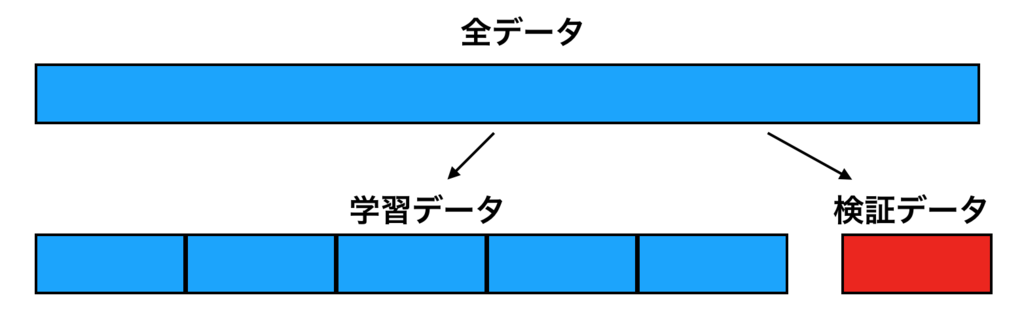



In [7]:
print(scores, scores.mean())



[1.         0.93333333 1.         0.93333333 0.93333333 0.86666667
 0.93333333 1.         1.         1.        ] 0.96


In [25]:
# 可視化する

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2, random_state=334)

model = DecisionTreeClassifier(max_depth=3)
model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [26]:
model.score(X_test, y_test)

0.9666666666666667

In [27]:
from sklearn import tree
tree.export_graphviz(model, out_file="decision_tree.dot", feature_names=iris.feature_names, class_names=iris.target_names, filled=True)

In [28]:
!pip install pydot
!pip install pydotplus

     |████████████████████████████████| 278 kB 2.8 MB/s eta 0:00:01
  Created wheel for pydotplus: filename=pydotplus-2.0.2-py3-none-any.whl size=24566 sha256=0c8303976decddc2d486bd661f3153a307174f039cae9762f180f8ea4d76ce6b
  Stored in directory: /home/jovyan/.cache/pip/wheels/1e/7b/04/7387cf6cc9e48b4a96e361b0be812f0708b394b821bf8c9c50
Successfully built pydotplus


In [29]:
import pydotplus
from IPython.display import Image
graph = pydotplus.graph_from_dot_file("decision_tree.dot")

![](graphviz.svg)